In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-pred/Churn_Dataset.csv


In [3]:
import pandas as pd
import os
import datetime
import numpy as np
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from gensim import models
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import lightgbm
from lightgbm import LGBMRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
import seaborn as sns
from geopy.geocoders import Nominatim


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

sns.set(style = 'white')

# Input data files are available in the "../input/" directory.

import os

In [4]:
df = pd.read_csv('../input/churn-pred/Churn_Dataset.csv')

In [5]:
df.head()

,user_pseudo_id,totalEventCount,engTime_sec,app_exception,app_clear_data,ad_close_event,album_art_change_event,bottom_mini_playing_bar_event,bottom_option_click_event,current_search_tab_event,edit_tags_page_events,equalizer_event,feature_popup_events,firebase_campaign,first_open,first_open_custom_date_event,floating_player_event,font_change_event,genres_page_event,ham_burger_click_event,inside_page_events,interstitial_ad_events,landing_page_events,language_dialog_events,list_item_clicked_event,lyrics_open_event,lyrics_page_events,mini_youtube_event,notification_events,number_of_items_event,os_update,permission_event,personalization_assignment,playing_window_event,playlist_event,playstore_rating_redirect_event,profile_page_events,remove_ads_purchase_event,ringtone_cutter_event,screen_view,settings_page_events,session_start,share,sort_by_events,theme_event,top_tab_event,user_engagement,video_notification_event,voice_assistant_event,wellness_event,widget_events,youtube_event,frequency,churn
0,d6bb454e4eb86f6dafaa486ffeac5479,95.714286,199.27500,0.0,0.0,0.285714,0.0,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.714286,0.0,0.0,5.142857,0.0,0.0,0.0,1.571429,2.428571,0.0,0.0,0.0,37.142857,0.0,0.0,0.0,4.00,0.0,28.714286,0.0,1.714286,0,0.0,0.0,0.0,12.714286,0.0,0.0,0,0.0,0.0,7,1
1,46496b6b416316acabcbf9e16cab37a3,14.000000,17.29000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.00,0.0,6.000000,0.0,1.000000,0,0.0,0.0,0.0,2.000000,0.0,0.0,0,0.0,0.0,1,1
2,284d7c02d9ebdfa9436e780d6d691807,36.250000,57.88425,0.0,0.0,0.000000,0.0,1.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,3.000000,0.0,0.0,0.0,8.250000,0.000000,0.0,0.0,2.5,2.000000,0.0,0.0,0.0,1.75,0.0,10.750000,0.0,2.750000,0,0.0,0.0,0.0,3.750000,0.0,0.0,0,0.0,0.0,4,1
3,1afa4b1c8fd1513e9b63a91042837a67,83.000000,91.86600,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,16.0,0.000000,0.0,0.0,0.0,8.00,0.0,33.000000,0.0,9.000000,0,0.0,0.0,0.0,17.000000,0.0,0.0,0,0.0,0.0,1,1
4,a1e2cf77bdc0172ea33011ac43f39f2f,77.500000,319.76350,0.0,0.0,0.000000,0.0,1.0,2.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,1.0,0.500000,0.0,0.0,9.500000,0.0,0.0,0.0,0.000000,3.500000,0.0,0.0,1.5,4.000000,0.5,0.0,0.0,1.50,0.0,32.500000,0.0,4.000000,0,0.0,0.0,0.0,15.000000,0.0,0.0,0,0.0,0.0,2,1


In [6]:
df.dtypes

user_pseudo_id                      object
totalEventCount                    float64
engTime_sec                        float64
app_exception                      float64
app_clear_data                     float64
ad_close_event                     float64
album_art_change_event             float64
bottom_mini_playing_bar_event      float64
bottom_option_click_event          float64
current_search_tab_event           float64
edit_tags_page_events              float64
equalizer_event                    float64
feature_popup_events               float64
firebase_campaign                  float64
first_open                         float64
first_open_custom_date_event       float64
floating_player_event              float64
font_change_event                  float64
genres_page_event                  float64
ham_burger_click_event             float64
inside_page_events                 float64
interstitial_ad_events             float64
landing_page_events                float64
language_di

In [7]:
df.shape

(10908, 54)

In [8]:
df.isnull().sum()

user_pseudo_id                     0
totalEventCount                    0
engTime_sec                        0
app_exception                      0
app_clear_data                     0
ad_close_event                     0
album_art_change_event             0
bottom_mini_playing_bar_event      0
bottom_option_click_event          0
current_search_tab_event           0
edit_tags_page_events              0
equalizer_event                    0
feature_popup_events               0
firebase_campaign                  0
first_open                         0
first_open_custom_date_event       0
floating_player_event              0
font_change_event                  0
genres_page_event                  0
ham_burger_click_event             0
inside_page_events                 0
interstitial_ad_events             0
landing_page_events                0
language_dialog_events             0
list_item_clicked_event            0
lyrics_open_event                  0
lyrics_page_events                 0
m

<AxesSubplot:>

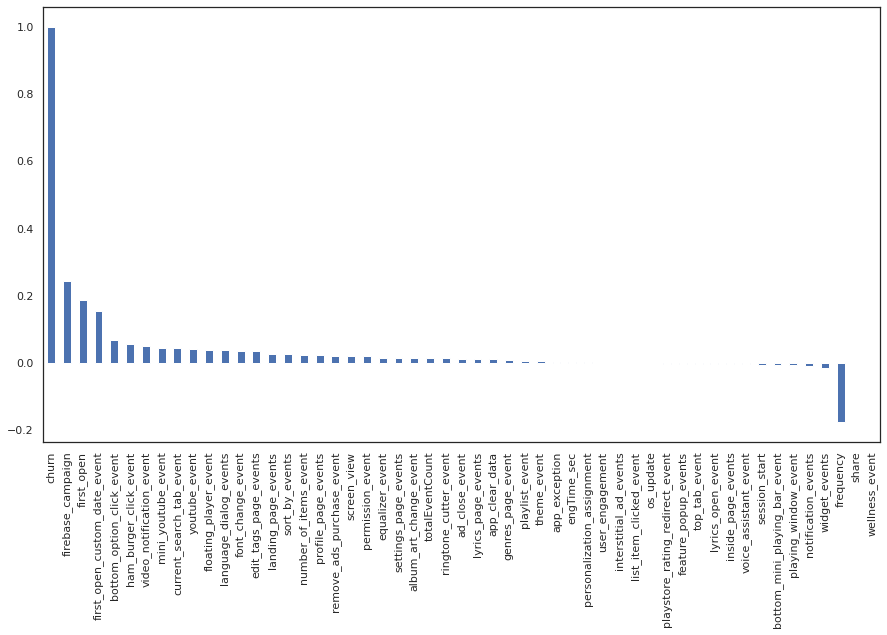

In [9]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

In [10]:
df.corr()

,totalEventCount,engTime_sec,app_exception,app_clear_data,ad_close_event,album_art_change_event,bottom_mini_playing_bar_event,bottom_option_click_event,current_search_tab_event,edit_tags_page_events,equalizer_event,feature_popup_events,firebase_campaign,first_open,first_open_custom_date_event,floating_player_event,font_change_event,genres_page_event,ham_burger_click_event,inside_page_events,interstitial_ad_events,landing_page_events,language_dialog_events,list_item_clicked_event,lyrics_open_event,lyrics_page_events,mini_youtube_event,notification_events,number_of_items_event,os_update,permission_event,personalization_assignment,playing_window_event,playlist_event,playstore_rating_redirect_event,profile_page_events,remove_ads_purchase_event,ringtone_cutter_event,screen_view,settings_page_events,session_start,share,sort_by_events,theme_event,top_tab_event,user_engagement,video_notification_event,voice_assistant_event,wellness_event,widget_events,youtube_event,frequency,churn
totalEventCount,1.000000,0.533637,0.113469,0.045701,0.151882,0.250488,0.568384,0.422924,0.312904,0.152261,0.221932,0.027908,0.065304,0.039903,0.055273,0.032003,0.039192,0.007749,0.234945,0.325799,0.504505,0.307158,0.014243,0.849827,0.168457,0.166248,0.059895,0.494892,0.653646,-0.025382,0.058842,0.484261,0.580777,0.175883,0.007616,0.041626,0.709266,0.045924,0.930069,0.098638,0.626979,NaN,0.083614,0.202446,0.075156,0.817575,0.117599,0.108785,NaN,0.082150,0.080789,0.217843,0.014949
engTime_sec,0.533637,1.000000,0.105333,0.000715,0.074119,0.078456,0.316548,0.252674,0.257366,0.059584,0.178221,0.024286,0.024216,0.008984,0.015558,0.056940,0.019654,0.000679,0.098251,0.219060,0.269220,0.135521,0.009087,0.474312,0.121140,0.121434,0.070455,0.126150,0.346802,-0.016701,0.005238,0.279935,0.338937,0.115928,0.000256,0.020123,0.380588,0.026129,0.519127,0.081953,0.337156,NaN,0.039316,0.058351,0.029640,0.466359,0.211212,0.037942,NaN,0.022207,0.213603,0.112302,0.001781
app_exception,0.113469,0.105333,1.000000,-0.000511,0.005752,0.009657,0.027117,0.083939,0.006058,0.001394,0.429229,-0.001493,0.067389,0.052409,0.040323,0.010994,0.001387,-0.000443,0.040893,0.010942,0.014113,0.007351,-0.000504,0.070070,0.106977,0.049509,0.000711,0.005568,0.062517,0.011969,-0.000362,0.037527,0.196774,0.022615,-0.000266,-0.001326,0.042516,0.001637,0.082255,-0.000831,0.030402,NaN,0.000046,-0.000645,-0.000308,0.054391,0.018142,0.013408,NaN,0.016675,0.024725,-0.008769,0.003304
app_clear_data,0.045701,0.000715,-0.000511,1.000000,-0.004316,-0.000830,-0.004090,0.003519,0.000321,-0.000943,-0.001701,-0.001477,0.001912,0.029199,0.121881,-0.001186,-0.000795,-0.000438,0.016019,0.001602,-0.003608,0.000117,-0.000498,-0.007147,0.000360,0.003265,0.001022,0.001478,-0.002051,-0.002278,0.903295,-0.007135,-0.003552,0.009296,-0.000263,-0.001311,0.000525,0.005275,0.025140,0.011071,0.227348,NaN,-0.001170,-0.000575,-0.000305,0.101715,-0.000603,0.000558,NaN,-0.001957,-0.000065,-0.005088,0.011166
ad_close_event,0.151882,0.074119,0.005752,-0.004316,1.000000,-0.001572,0.058639,0.009562,0.033315,-0.006558,0.033593,0.021214,-0.047953,-0.041914,-0.025662,-0.002127,-0.004557,-0.003525,0.029961,0.034785,0.304592,0.015395,-0.003744,0.138801,0.020688,0.011399,-0.004395,0.061300,0.090922,-0.009438,-0.008029,0.036580,0.028516,0.001683,-0.002115,-0.000177,0.051341,0.016028,0.138629,-0.004032,0.011389,NaN,-0.001423,-0.000823,-0.002454,0.129705,-0.001037,-0.001959,NaN,0.004986,-0.003727,0.068531,0.012304
album_art_change_event,0.250488,0.078456,0.009657,-0.000830,-0.001572,1.000000,0.120280,0.028319,0.009773,0.558647,0.026952,-0.002176,0.044205,0.031475,0.023623,-0.000045,0.050393,0.000075,0.498392,0.012818,0.004337,0.202201,0.001190,0.175900,0.099765,0.121262,0.001163,0.015287,0.063383,-0.003117,0.004990,0.086845,0.086836,0.026535,0.002081,0.027141,0.069183,0.012071,0.308746,0.017851,0.044142,NaN,0.028622,0.745223,0.028462,0.249519,0.007146,0.016702,NaN,0.010759,0.002415,-0.003294,0.015163
bottom_mini_playing_bar_event,0.568384,0.316548,

**Bivariate Analysis**

<AxesSubplot:xlabel='screen_view', ylabel='totalEventCount'>

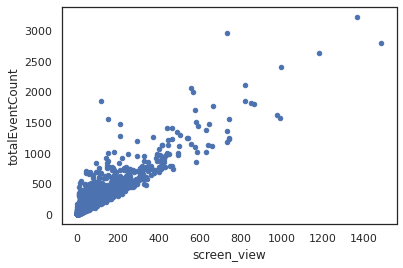

In [12]:
# both variables are dependent on each other
df[['screen_view', 'totalEventCount']].plot.scatter(x = 'screen_view',
                                                              y='totalEventCount')

In [13]:
df.churn.value_counts()

0    10120
1      788
Name: churn, dtype: int64

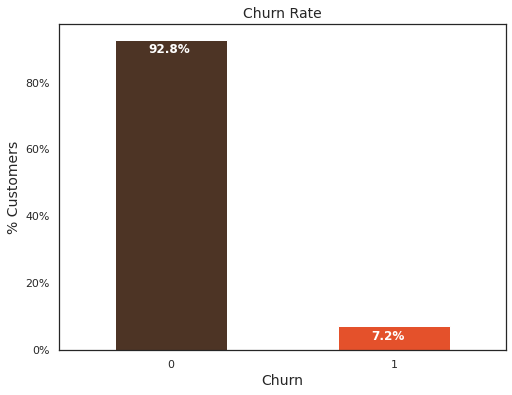

In [14]:
colors = ['#4D3425','#E4512B']
ax = (df['churn'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           #size = 14
           )

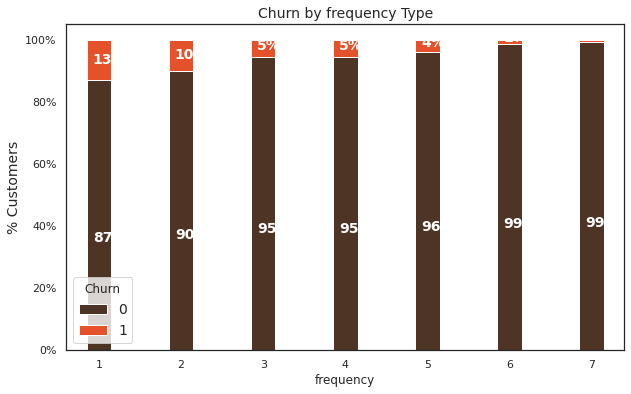

In [16]:
colors = ['#4D3425','#E4512B']
contract_churn = df.groupby(['frequency','churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by frequency Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

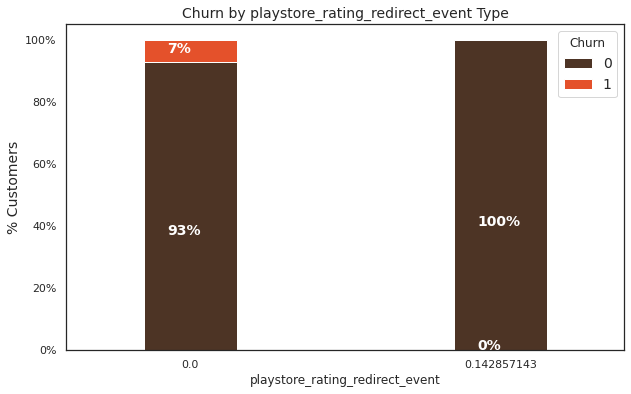

In [18]:
colors = ['#4D3425','#E4512B']
contract_churn = df.groupby(['playstore_rating_redirect_event','churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by playstore_rating_redirect_event Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

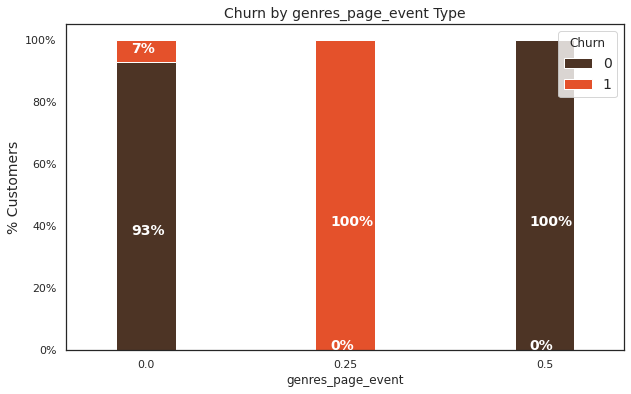

In [19]:
colors = ['#4D3425','#E4512B']
contract_churn = df.groupby(['genres_page_event','churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by genres_page_event Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

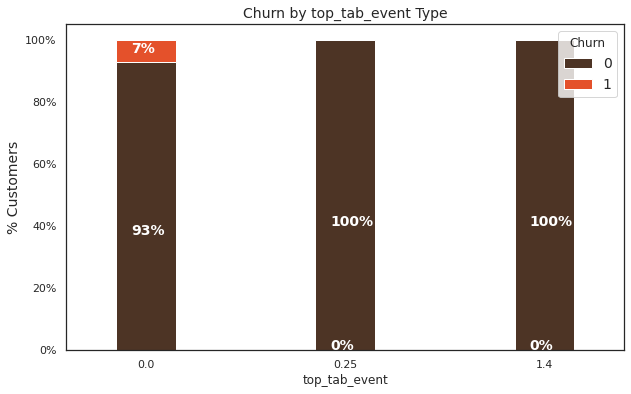

In [20]:
colors = ['#4D3425','#E4512B']
contract_churn = df.groupby(['top_tab_event','churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by top_tab_event Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

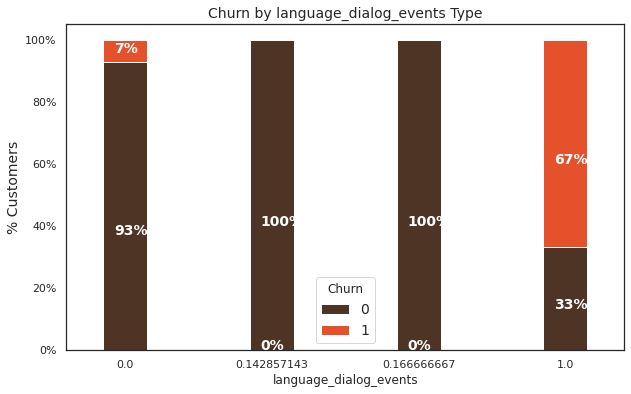

In [21]:
colors = ['#4D3425','#E4512B']
contract_churn = df.groupby(['language_dialog_events','churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by language_dialog_events Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

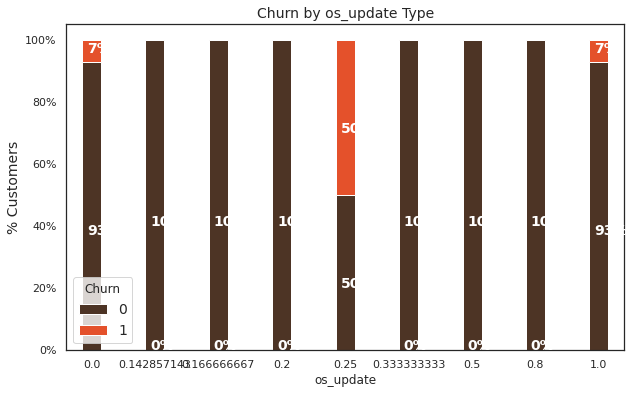

In [22]:
colors = ['#4D3425','#E4512B']
contract_churn = df.groupby(['os_update','churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by os_update Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Text(0.5, 1.0, 'Distribution of bottom_option_click_event by churn')

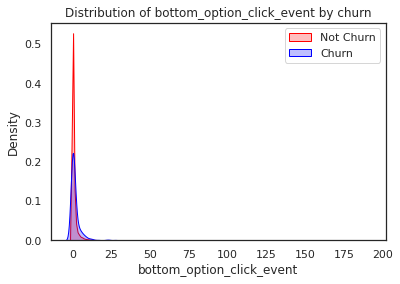

In [23]:
ax = sns.kdeplot(df.bottom_option_click_event[(df["churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.bottom_option_click_event[(df["churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('bottom_option_click_event')
ax.set_title('Distribution of bottom_option_click_event by churn')

Text(0.5, 1.0, 'Distribution of youtube_event by churn')

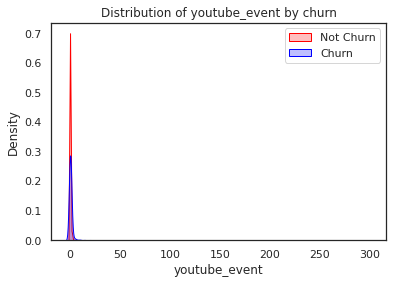

In [24]:
ax = sns.kdeplot(df.youtube_event[(df["churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.youtube_event[(df["churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('youtube_event')
ax.set_title('Distribution of youtube_event by churn')

Text(0.5, 1.0, 'Distribution of ham_burger_click_event by churn')

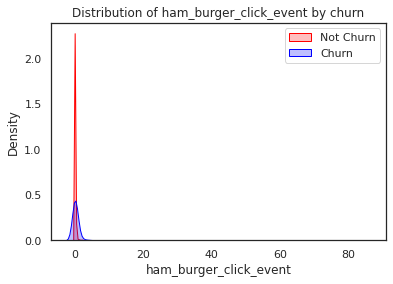

In [25]:
ax = sns.kdeplot(df.ham_burger_click_event[(df["churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.ham_burger_click_event[(df["churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('ham_burger_click_event')
ax.set_title('Distribution of ham_burger_click_event by churn')

Text(0.5, 1.0, 'Distribution of first_open_custom_date_event by churn')

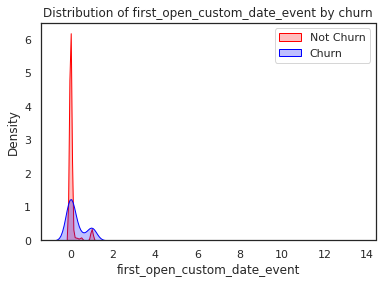

In [26]:
ax = sns.kdeplot(df.first_open_custom_date_event[(df["churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.first_open_custom_date_event[(df["churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('first_open_custom_date_event')
ax.set_title('Distribution of first_open_custom_date_event by churn')

Text(0.5, 1.0, 'Distribution of first_open by churn')

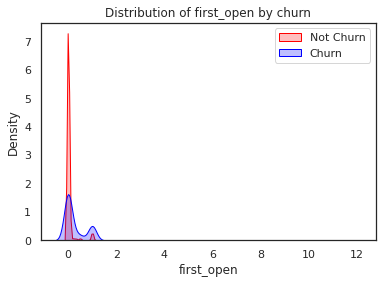

In [27]:
ax = sns.kdeplot(df.first_open[(df["churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.first_open[(df["churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('first_open')
ax.set_title('Distribution of first_open by churn')

Text(0.5, 1.0, 'Distribution of firebase_campaign by churn')

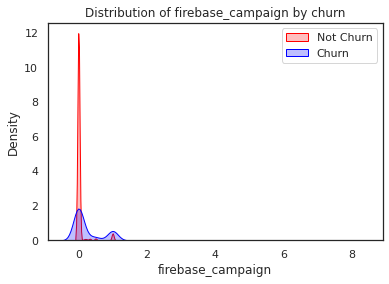

In [28]:
ax = sns.kdeplot(df.firebase_campaign[(df["churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.firebase_campaign[(df["churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('firebase_campaign')
ax.set_title('Distribution of firebase_campaign by churn')

Text(0.5, 1.0, 'Distribution of current_search_tab_event by churn')

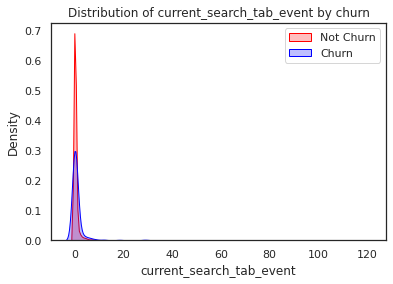

In [29]:
ax = sns.kdeplot(df.current_search_tab_event[(df["churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.current_search_tab_event[(df["churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('current_search_tab_event')
ax.set_title('Distribution of current_search_tab_event by churn')

Text(0.5, 1.0, 'Distribution of landing_page_events by churn')

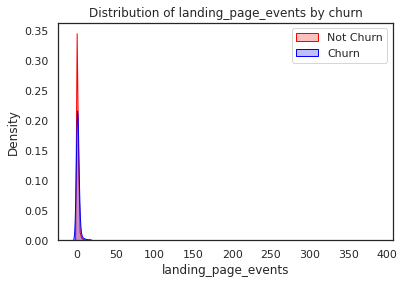

In [30]:
ax = sns.kdeplot(df.landing_page_events[(df["churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.landing_page_events[(df["churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('landing_page_events')
ax.set_title('Distribution of landing_page_events by churn')

Text(0.5, 1.0, 'Distribution of equalizer_event by churn')

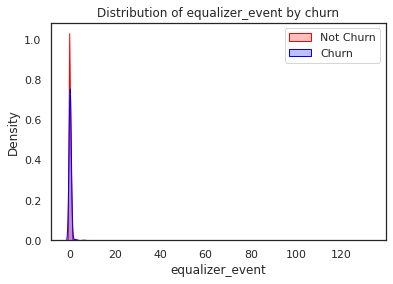

In [31]:
ax = sns.kdeplot(df.equalizer_event[(df["churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.equalizer_event[(df["churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('equalizer_event')
ax.set_title('Distribution of equalizer_event by churn')

Text(0.5, 1.0, 'Distribution of interstitial_ad_events by churn')

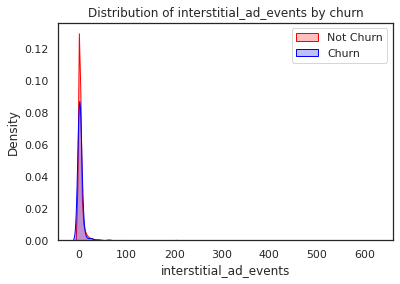

In [32]:
ax = sns.kdeplot(df.interstitial_ad_events[(df["churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.interstitial_ad_events[(df["churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('interstitial_ad_events')
ax.set_title('Distribution of interstitial_ad_events by churn')

Text(0.5, 1.0, 'Distribution of totalEventCount by churn')

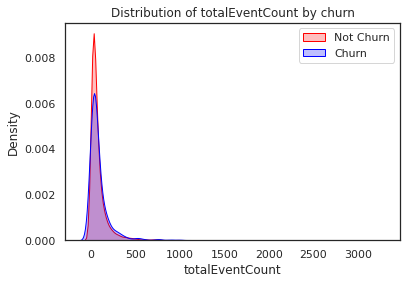

In [33]:
ax = sns.kdeplot(df.totalEventCount[(df["churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.totalEventCount[(df["churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('totalEventCount')
ax.set_title('Distribution of totalEventCount by churn')

Text(0.5, 1.0, 'Distribution of engTime_sec by churn')

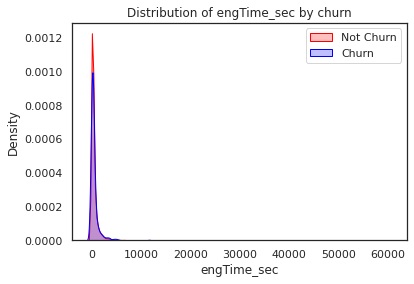

In [34]:
ax = sns.kdeplot(df.engTime_sec[(df["churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.engTime_sec[(df["churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('engTime_sec')
ax.set_title('Distribution of engTime_sec by churn')

Text(0.5, 1.0, 'Distribution of app_exception by churn')

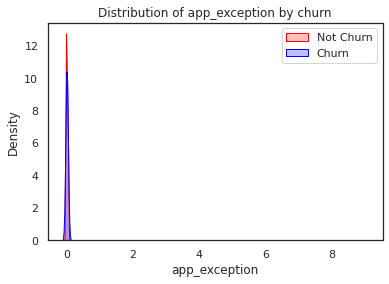

In [35]:
ax = sns.kdeplot(df.app_exception[(df["churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.app_exception[(df["churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('app_exception')
ax.set_title('Distribution of app_exception by churn')

Text(0.5, 1.0, 'Distribution of app_clear_data by churn')

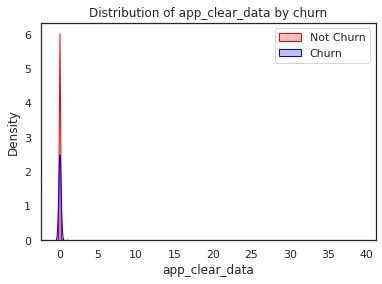

In [36]:
ax = sns.kdeplot(df.app_clear_data[(df["churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.app_clear_data[(df["churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('app_clear_data')
ax.set_title('Distribution of app_clear_data by churn')

Text(0.5, 1.0, 'Distribution of firebase_campaign by churn')

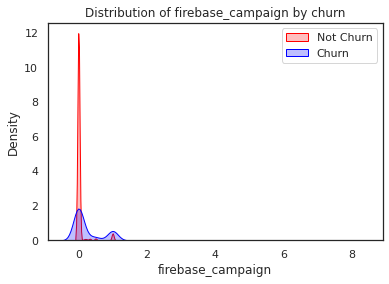

In [37]:
ax = sns.kdeplot(df.firebase_campaign[(df["churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.firebase_campaign[(df["churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('firebase_campaign')
ax.set_title('Distribution of firebase_campaign by churn')

Text(0.5, 1.0, 'Distribution of first_open by churn')

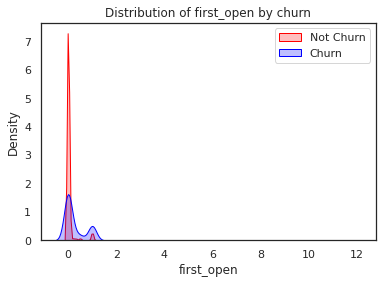

In [38]:
ax = sns.kdeplot(df.first_open[(df["churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.first_open[(df["churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('first_open')
ax.set_title('Distribution of first_open by churn')

Text(0.5, 1.0, 'Distribution of first_open_custom_date_event by churn')

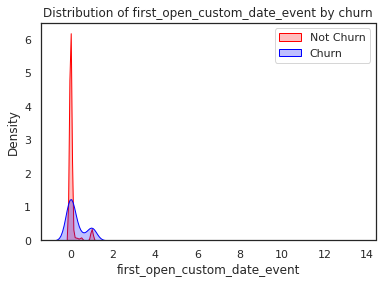

In [39]:
ax = sns.kdeplot(df.first_open_custom_date_event[(df["churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.first_open_custom_date_event[(df["churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('first_open_custom_date_event')
ax.set_title('Distribution of first_open_custom_date_event by churn')

In [41]:
df.drop_duplicates(inplace=True)

In [42]:
# time related columns - 'engTime_sec', 'screen_view', 'user_engagement',

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['churn'], axis=1),
    df.churn,
    test_size=0.3,
    random_state=192)

X_train.shape, X_test.shape

((7635, 53), (3273, 53))

In [44]:
y_train = pd.DataFrame(data=y_train, columns=['churn'])
y_test = pd.DataFrame(data=y_test, columns=['churn'])

In [45]:
# count encoding
def categorical_to_counts(df_train, df_test):
    
    df_train_temp = df_train.copy()
    df_test_temp = df_test.copy()
    
    for col in ['genres_page_event',
'playstore_rating_redirect_event', 
 'frequency', 'share', 'wellness_event']:
        
        # dictionary mapping category to counts
        counts_map = df_train_temp[col].value_counts().to_dict()
        
        # remap the labels to their counts
        df_train_temp[col+'_count'] = df_train_temp[col].map(counts_map)
        df_test_temp[col+'_count'] = df_test_temp[col].map(counts_map)
        
    return df_train_temp, df_test_temp

X_train_count, X_test_count = categorical_to_counts(X_train, X_test)

X_train_count.head()

,user_pseudo_id,totalEventCount,engTime_sec,app_exception,app_clear_data,ad_close_event,album_art_change_event,bottom_mini_playing_bar_event,bottom_option_click_event,current_search_tab_event,edit_tags_page_events,equalizer_event,feature_popup_events,firebase_campaign,first_open,first_open_custom_date_event,floating_player_event,font_change_event,genres_page_event,ham_burger_click_event,inside_page_events,interstitial_ad_events,landing_page_events,language_dialog_events,list_item_clicked_event,lyrics_open_event,lyrics_page_events,mini_youtube_event,notification_events,number_of_items_event,os_update,permission_event,personalization_assignment,playing_window_event,playlist_event,playstore_rating_redirect_event,profile_page_events,remove_ads_purchase_event,ringtone_cutter_event,screen_view,settings_page_events,session_start,share,sort_by_events,theme_event,top_tab_event,user_engagement,video_notification_event,voice_assistant_event,wellness_event,widget_events,youtube_event,frequency,genres_page_event_count,playstore_rating_redirect_event_count,frequency_count,share_count,wellness_event_count
6205,67648fd307a951a7c69c376f5bc30a61,23.000000,50.519,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2.000000,0.0,0.0,0.0,0.000000,3.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,2.0,0.0,12.000000,0.0,2.000000,0,0.0,0.0,0.0,2.000000,0.0,0.0,0,0.0,0.0,1,7633,7634,2206,7635,7635
7321,e33c534cb25f6bfd8d13738c6d81e424,18.333333,59.212,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.333333,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,2.666667,0.0,0.0,0.0,0.0,2.0,0.0,8.333333,0.0,1.666667,0,0.0,0.0,0.0,2.333333,0.0,0.0,0,0.0,0.0,3,7633,7634,900,7635,7635
5623,3187526a54f527715c4caf8fb74b9f02,9.000000,7.234,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,4.000000,0.0,1.000000,0,0.0,0.0,0.0,1.000000,0.0,0.0,0,0.0,0.0,1,7633,7634,2206,7635,7635
6548,e86c86b1fc87d46cc89861e0c52586b0,12.000000,39.758,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.500000,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,3.000000,0.0,0.0,0.0,0.0,1.0,0.0,5.500000,0.0,1.000000,0,0.0,0.0,0.0,0.500000,0.0,0.0,0,0.0,0.0,2,7633,7634,1232,7635,7635
6899,9cfb5ea3c8a8582b12d2dca326c5f512,12.500000,135.300,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.500000,0.0,0.0,0.0,1.500000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.5,0.0,3.500000,0.0,2.000000,0,0.0,0.0,0.0,3.500000,0.0,0.0,0,0.0,0.0,2,7633,7634,1232,7635,7635


In [46]:
# ordered integer encoding

def categories_to_ordered(df_train, df_test, y_train, y_test):
    
    df_train_temp = pd.concat([df_train, y_train], axis=1).copy()
    df_test_temp = pd.concat([df_test, y_test], axis=1).copy()
    
    for col in ['genres_page_event',
'playstore_rating_redirect_event', 
 'frequency', 'share', 'wellness_event']:
        
        # order categories according to target mean
        ordered_labels = df_train_temp.groupby(
              [col])['churn'].mean().sort_values().index
        
        # dictionary to map ordered labels to ordinal number
        ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}
        
        # remap the categories to these ordinal numbers
        df_train_temp[col+'_ordinal'] = df_train[col].map(ordinal_label)
        df_test_temp[col+'_ordinal'] = df_test[col].map(ordinal_label)
        
        
    # remove the target
    df_train_temp.drop(['churn'], axis=1, inplace=True)
    df_test_temp.drop(['churn'], axis=1, inplace=True)
    
    return df_train_temp, df_test_temp


X_train_ordered, X_test_ordered = categories_to_ordered(
        X_train_count, X_test_count, y_train, y_test)

X_train_ordered.head()

,user_pseudo_id,totalEventCount,engTime_sec,app_exception,app_clear_data,ad_close_event,album_art_change_event,bottom_mini_playing_bar_event,bottom_option_click_event,current_search_tab_event,edit_tags_page_events,equalizer_event,feature_popup_events,firebase_campaign,first_open,first_open_custom_date_event,floating_player_event,font_change_event,genres_page_event,ham_burger_click_event,inside_page_events,interstitial_ad_events,landing_page_events,language_dialog_events,list_item_clicked_event,lyrics_open_event,lyrics_page_events,mini_youtube_event,notification_events,number_of_items_event,os_update,permission_event,personalization_assignment,playing_window_event,playlist_event,playstore_rating_redirect_event,profile_page_events,remove_ads_purchase_event,ringtone_cutter_event,screen_view,settings_page_events,session_start,share,sort_by_events,theme_event,top_tab_event,user_engagement,video_notification_event,voice_assistant_event,wellness_event,widget_events,youtube_event,frequency,genres_page_event_count,playstore_rating_redirect_event_count,frequency_count,share_count,wellness_event_count,genres_page_event_ordinal,playstore_rating_redirect_event_ordinal,frequency_ordinal,share_ordinal,wellness_event_ordinal
6205,67648fd307a951a7c69c376f5bc30a61,23.000000,50.519,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2.000000,0.0,0.0,0.0,0.000000,3.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,2.0,0.0,12.000000,0.0,2.000000,0,0.0,0.0,0.0,2.000000,0.0,0.0,0,0.0,0.0,1,7633,7634,2206,7635,7635,1,1,6,0,0
7321,e33c534cb25f6bfd8d13738c6d81e424,18.333333,59.212,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.333333,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,2.666667,0.0,0.0,0.0,0.0,2.0,0.0,8.333333,0.0,1.666667,0,0.0,0.0,0.0,2.333333,0.0,0.0,0,0.0,0.0,3,7633,7634,900,7635,7635,1,1,3,0,0
5623,3187526a54f527715c4caf8fb74b9f02,9.000000,7.234,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,4.000000,0.0,1.000000,0,0.0,0.0,0.0,1.000000,0.0,0.0,0,0.0,0.0,1,7633,7634,2206,7635,7635,1,1,6,0,0
6548,e86c86b1fc87d46cc89861e0c52586b0,12.000000,39.758,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.500000,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,3.000000,0.0,0.0,0.0,0.0,1.0,0.0,5.500000,0.0,1.000000,0,0.0,0.0,0.0,0.500000,0.0,0.0,0,0.0,0.0,2,7633,7634,1232,7635,7635,1,1,5,0,0
6899,9cfb5ea3c8a8582b12d2dca326c5f512,12.500000,135.300,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.500000,0.0,0.0,0.0,1.500000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.5,0.0,3.500000,0.0,2.000000,0,0.0,0.0,0.0,3.500000,0.0,0.0,0,0.0,0.0,2,7633,7634,1232,7635,7635,1,1,5,0,0


In [47]:
# mean encoding

def categories_to_mean(df_train, df_test, y_train, y_test):
    
    df_train_temp = pd.concat([df_train, y_train], axis=1).copy()
    df_test_temp = pd.concat([df_test, y_test], axis=1).copy()
    
    for col in ['genres_page_event',
'playstore_rating_redirect_event', 
 'frequency', 'share', 'wellness_event']:
        
        ordered_labels = df_train_temp.groupby(
             [col])['churn'].mean().to_dict()
        
        # remap the categories to target mean
        df_train_temp[col+'_mean_encoding'] = df_train[col].map(ordered_labels)
        df_test_temp[col+'_mean_encoding'] = df_test[col].map(ordered_labels)
        
    # remove target
    df_train_temp.drop(['churn'], axis=1, inplace=True)
    df_test_temp.drop(['churn'], axis=1, inplace=True)
    
    return df_train_temp, df_test_temp

X_train_mean, X_test_mean = categories_to_mean(
     X_train_ordered, X_test_ordered, y_train, y_test)

X_train_mean.head()

,user_pseudo_id,totalEventCount,engTime_sec,app_exception,app_clear_data,ad_close_event,album_art_change_event,bottom_mini_playing_bar_event,bottom_option_click_event,current_search_tab_event,edit_tags_page_events,equalizer_event,feature_popup_events,firebase_campaign,first_open,first_open_custom_date_event,floating_player_event,font_change_event,genres_page_event,ham_burger_click_event,inside_page_events,interstitial_ad_events,landing_page_events,language_dialog_events,list_item_clicked_event,lyrics_open_event,lyrics_page_events,mini_youtube_event,notification_events,number_of_items_event,os_update,permission_event,personalization_assignment,playing_window_event,playlist_event,playstore_rating_redirect_event,profile_page_events,remove_ads_purchase_event,ringtone_cutter_event,screen_view,settings_page_events,session_start,share,sort_by_events,theme_event,top_tab_event,user_engagement,video_notification_event,voice_assistant_event,wellness_event,widget_events,youtube_event,frequency,genres_page_event_count,playstore_rating_redirect_event_count,frequency_count,share_count,wellness_event_count,genres_page_event_ordinal,playstore_rating_redirect_event_ordinal,frequency_ordinal,share_ordinal,wellness_event_ordinal,genres_page_event_mean_encoding,playstore_rating_redirect_event_mean_encoding,frequency_mean_encoding,share_mean_encoding,wellness_event_mean_encoding
6205,67648fd307a951a7c69c376f5bc30a61,23.000000,50.519,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2.000000,0.0,0.0,0.0,0.000000,3.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,2.0,0.0,12.000000,0.0,2.000000,0,0.0,0.0,0.0,2.000000,0.0,0.0,0,0.0,0.0,1,7633,7634,2206,7635,7635,1,1,6,0,0,0.071794,0.071915,0.123753,0.071906,0.071906
7321,e33c534cb25f6bfd8d13738c6d81e424,18.333333,59.212,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.333333,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,2.666667,0.0,0.0,0.0,0.0,2.0,0.0,8.333333,0.0,1.666667,0,0.0,0.0,0.0,2.333333,0.0,0.0,0,0.0,0.0,3,7633,7634,900,7635,7635,1,1,3,0,0,0.071794,0.071915,0.056667,0.071906,0.071906
5623,3187526a54f527715c4caf8fb74b9f02,9.000000,7.234,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,4.000000,0.0,1.000000,0,0.0,0.0,0.0,1.000000,0.0,0.0,0,0.0,0.0,1,7633,7634,2206,7635,7635,1,1,6,0,0,0.071794,0.071915,0.123753,0.071906,0.071906
6548,e86c86b1fc87d46cc89861e0c52586b0,12.000000,39.758,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.500000,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,3.000000,0.0,0.0,0.0,0.0,1.0,0.0,5.500000,0.0,1.000000,0,0.0,0.0,0.0,0.500000,0.0,0.0,0,0.0,0.0,2,7633,7634,1232,7635,7635,1,1,5,0,0,0.071794,0.071915,0.105519,0.071906,0.071906
6899,9cfb5ea3c8a8582b12d2dca326c5f512,12.500000,135.300,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.500000,0.0,0.0,0.0,1.500000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.5,0.0,3.500000,0.0,2.000000,0,0.0,0.0,0.0,3.500000,0.0,0.0,0,0.0,0.0,2,7633,7634,1232,7635,7635,1,1,5,0,0,0.071794,0.071915,0.105519,0.071906,0.071906


In [48]:
for col in [ 'top_tab_event', 'playstore_rating_redirect_event',
 'theme_event', 'voice_assistant_event', 'genres_page_event', 'album_art_change_event',
 'permission_event', 'app_clear_data', 'app_exception', 'equalizer_event'
]:
    X_train_mean[col] = X_train_mean[col].astype('float')
    X_test_mean[col] = X_test_mean[col].astype('float')
    
    X_train_mean[col+'_yeo'], param = stats.yeojohnson(X_train_mean[
        col])
    X_test_mean[col+'_yeo'] = stats.yeojohnson(X_test_mean[col], param)

In [49]:
X_train_mean.head()

,user_pseudo_id,totalEventCount,engTime_sec,app_exception,app_clear_data,ad_close_event,album_art_change_event,bottom_mini_playing_bar_event,bottom_option_click_event,current_search_tab_event,edit_tags_page_events,equalizer_event,feature_popup_events,firebase_campaign,first_open,first_open_custom_date_event,floating_player_event,font_change_event,genres_page_event,ham_burger_click_event,inside_page_events,interstitial_ad_events,landing_page_events,language_dialog_events,list_item_clicked_event,lyrics_open_event,lyrics_page_events,mini_youtube_event,notification_events,number_of_items_event,os_update,permission_event,personalization_assignment,playing_window_event,playlist_event,playstore_rating_redirect_event,profile_page_events,remove_ads_purchase_event,ringtone_cutter_event,screen_view,settings_page_events,session_start,share,sort_by_events,theme_event,top_tab_event,user_engagement,video_notification_event,voice_assistant_event,wellness_event,widget_events,youtube_event,frequency,genres_page_event_count,playstore_rating_redirect_event_count,frequency_count,share_count,wellness_event_count,genres_page_event_ordinal,playstore_rating_redirect_event_ordinal,frequency_ordinal,share_ordinal,wellness_event_ordinal,genres_page_event_mean_encoding,playstore_rating_redirect_event_mean_encoding,frequency_mean_encoding,share_mean_encoding,wellness_event_mean_encoding,top_tab_event_yeo,playstore_rating_redirect_event_yeo,theme_event_yeo,voice_assistant_event_yeo,genres_page_event_yeo,album_art_change_event_yeo,permission_event_yeo,app_clear_data_yeo,app_exception_yeo,equalizer_event_yeo
6205,67648fd307a951a7c69c376f5bc30a61,23.000000,50.519,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2.000000,0.0,0.0,0.0,0.000000,3.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,2.0,0.0,12.000000,0.0,2.000000,0,0.0,0.0,0.0,2.000000,0.0,0.0,0,0.0,0.0,1,7633,7634,2206,7635,7635,1,1,6,0,0,0.071794,0.071915,0.123753,0.071906,0.071906,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
7321,e33c534cb25f6bfd8d13738c6d81e424,18.333333,59.212,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.333333,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,2.666667,0.0,0.0,0.0,0.0,2.0,0.0,8.333333,0.0,1.666667,0,0.0,0.0,0.0,2.333333,0.0,0.0,0,0.0,0.0,3,7633,7634,900,7635,7635,1,1,3,0,0,0.071794,0.071915,0.056667,0.071906,0.071906,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
5623,3187526a54f527715c4caf8fb74b9f02,9.000000,7.234,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,4.000000,0.0,1.000000,0,0.0,0.0,0.0,1.000000,0.0,0.0,0,0.0,0.0,1,7633,7634,2206,7635,7635,1,1,6,0,0,0.071794,0.071915,0.123753,0.071906,0.071906,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
6548,e86c86b1fc87d46cc89861e0c52586b0,12.000000,39.758,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.500000,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,3.000000,0.0,0.0,0.0,0.0,1.0,0.0,5.500000,0.0,1.000000,0,0.0,0.0,0.0,0.500000,0.0,0.0,0,0.0,0.0,2,7633,7634,1232,7635,7635,1,1,5,0,0,0.071794,0.071915,0.105519,0.071906,0.071906,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
6899,9cfb5ea3c8a8582b12d2dca326c5f512,12.500000,135.300,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.500000,0.0,0.0,0.0,1.500000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.5,0.0,3.500000,0.0,2.000000,0,0.0,0.0,0.0,3.500000,0.0,0.0,0,0.0,0.0,2,7633,7634,1232,7635,7635,1,1,5,0,0,0.071794,0.071915,0.105519,0.071906,0.071906,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [50]:
for col in X_train_mean.columns:
    if (X_train_mean[col].isnull().sum() > 0):
        print(col)

In [51]:
# the scaler - for robust scaling
from sklearn.preprocessing import Normalizer

# set up the scaler 
scaler = Normalizer(norm='l1')
# reset the index
X_train_mean = X_train_mean.drop(columns=['user_pseudo_id']).reset_index(drop=True)
X_test_mean = X_test_mean.drop(columns=['user_pseudo_id']).reset_index(drop=True)
# fit the scaler
scaler.fit(X_train_mean)

X_train_scaled = scaler.transform(X_train_mean)
X_test_scaled = scaler.transform(X_test_mean)

# transform numpy arrays to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, 
                              columns=X_train_mean.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,
                            columns=X_test_mean.columns)

X_train_scaled.columns = [str(col) + '_scaled' for col in 
                          X_train_scaled.columns]
X_test_scaled.columns = [str(col) + '_scaled' for col in 
                          X_test_scaled.columns]

X_train_mean = pd.concat([X_train_mean.reset_index(drop=True),
                          X_train_scaled.reset_index(drop=True)],
                         axis=1)
X_test_mean = pd.concat([X_test_mean.reset_index(drop=True),
                         X_test_scaled.reset_index(drop=True)],
                        axis=1)
X_train_mean.shape, X_test_mean.shape

((7635, 154), (3273, 154))

In [52]:
for col in X_train_mean.columns:
    if X_train_mean[col].isnull().sum()>0:
        print(col)

In [53]:
for col in X_test_mean.columns:
    if X_test_mean[col].isnull().sum()>0:
        print(col)

In [54]:
# remove constant and quasi-constant features

quasi_constant_feat = []

for feature in X_train_mean.columns:
    
    predominant = (X_train_mean[feature].value_counts()/np.float(
        len(X_train_mean))).sort_values(ascending=False).values[
        0]
    
    if predominant > 0.998:
        quasi_constant_feat.append(feature)
        
X_train_mean.drop(columns=quasi_constant_feat, inplace=True)
X_test_mean.drop(columns=quasi_constant_feat, inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


In [55]:
quasi_constant_feat

['font_change_event',
 'genres_page_event',
 'language_dialog_events',
 'playstore_rating_redirect_event',
 'share',
 'top_tab_event',
 'voice_assistant_event',
 'wellness_event',
 'genres_page_event_count',
 'playstore_rating_redirect_event_count',
 'share_count',
 'wellness_event_count',
 'genres_page_event_ordinal',
 'playstore_rating_redirect_event_ordinal',
 'share_ordinal',
 'wellness_event_ordinal',
 'genres_page_event_mean_encoding',
 'playstore_rating_redirect_event_mean_encoding',
 'share_mean_encoding',
 'wellness_event_mean_encoding',
 'top_tab_event_yeo',
 'playstore_rating_redirect_event_yeo',
 'voice_assistant_event_yeo',
 'genres_page_event_yeo',
 'font_change_event_scaled',
 'genres_page_event_scaled',
 'language_dialog_events_scaled',
 'playstore_rating_redirect_event_scaled',
 'share_scaled',
 'top_tab_event_scaled',
 'voice_assistant_event_scaled',
 'wellness_event_scaled',
 'share_ordinal_scaled',
 'wellness_event_ordinal_scaled',
 'top_tab_event_yeo_scaled',
 'pla

In [56]:
# remove duplicated features

duplicated_feat = []
for i in range(0, len(X_train_mean.columns)):
    if i%10 == 0:
        print(i)
        
    col_1 = X_train_mean.columns[i]
    for col_2 in X_train_mean.columns[i+1:]:
        if X_train_mean[col_1].equals(X_train_mean[col_2]):
            duplicated_feat.append(col_2)
            
X_train_mean.drop(columns=duplicated_feat, inplace=True)
X_test_mean.drop(columns=duplicated_feat, inplace=True)
X_train_mean.shape, X_test_mean.shape

0
10
20
30
40
50
60
70
80
90
100
110


((7635, 114), (3273, 114))

In [57]:
X_train = X_train_mean.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test_mean.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7635, 114), (3273, 114), (7635, 1), (3273, 1))

In [58]:
# remove correlated features to reduce the feature space

def correlation(dataset, threshold):
    # set of all the names of correlated columns
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)))


X_train = X_train.drop(columns=corr_features)
X_test = X_test.drop(columns=corr_features)
X_train.shape, X_test.shape

correlated features:  66


((7635, 48), (3273, 48))

In [59]:
df['churn'].value_counts()

0    10120
1      788
Name: churn, dtype: int64

In [60]:
class_names=['Non Churner', 'Churner']

In [62]:
# first step of this procedure
# build ML algorithm using all features
# then determine the importance of features according
# to algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score

model_full = RandomForestClassifier(
                                      random_state=192)

model_full.fit(X_train, y_train)

# calculate r2 in the test set
y_pred_test = model_full.predict(X_test)
r2_full = r2_score(y_test, y_pred_test)
#rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('Test full dataset R2 = %f' % (r2_full))
#print('Test RMSE = %f' % (rmse))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Test full dataset R2 = -0.146479


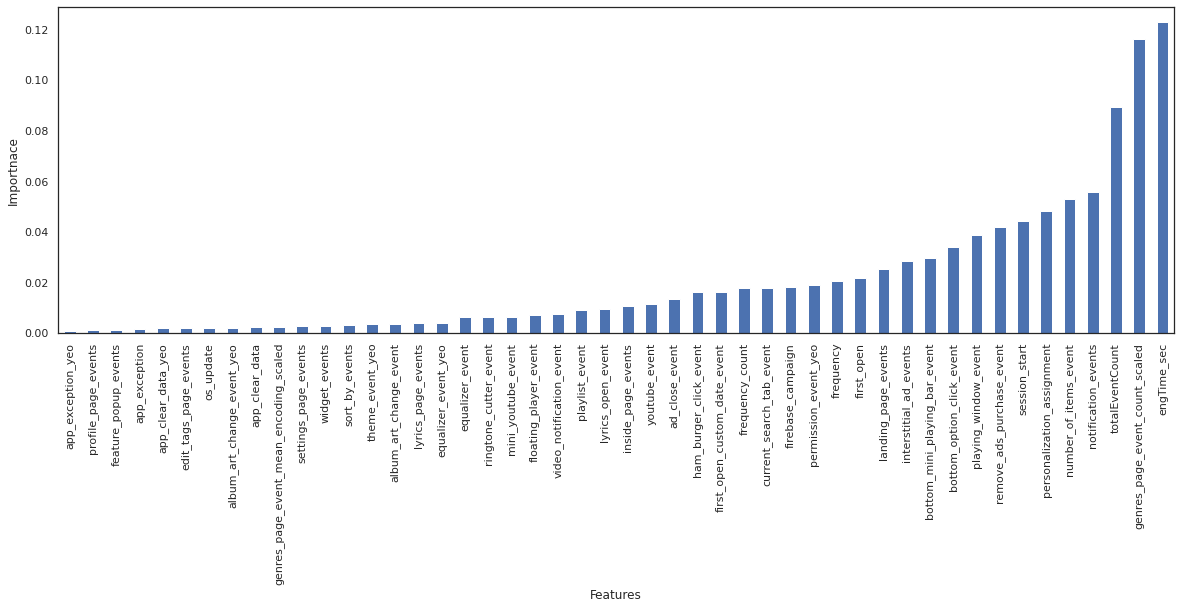

In [63]:
# the second step consist of deriving the importance of
# each feature and ranking them from th eleast to the
# most important

# get feature name and importance
features = pd.Series(model_full.feature_importances_)
features.index = X_train.columns

# sort the features by importance
features.sort_values(ascending=True, inplace=True)

# plot
features.plot.bar(figsize=(20,6))
plt.xlabel('Features')
plt.ylabel('Importnace')
plt.show()

In [64]:
features= list(features.index)

In [65]:
# the final step consists in removing one at a time
# all the features, from the least to the most important
# and build model at each round

# once, we build the model, we calculate the ne wr2
# if the new r2 is smaller than the original one
# (with all the features), then that feature that was 
# removed was important, and we should keep it
# otherwise, we should remove the feature

# recursive feature elimination:

# first we arbitrarily set the drop in r2, if the drop 
# is below this threshold, the feature will be removed

tol = 0.001

print('doing recursive feature elimination')

# we initialise a list where we will collect the features
# we should remove
features_to_remove = []

# set a counter to know which feature is being 
# evaluated
count = 1

# now we loop over all the features, in order of importance
# remember that features in the list are ordered by
# importance
for feature in features:
    print()
    print('testing feature: ', feature, count, ' out of ', len(features))
    count = count + 1
    
    # initialise model
    model_int = RandomForestClassifier(n_estimators=10,
                                         max_depth=4,
                                         random_state=192)
    
    # fit model with all variables minus the removed features
    # and the features to be evaluated
    model_int.fit(
      X_train.drop(features_to_remove + [feature], axis=1), y_train)
    
    # make a prediction over the test set
    y_pred_test = model_int.predict(
      X_test.drop(features_to_remove + [feature], axis=1))
    
    # calculate the new r2
    r2_int = r2_score(y_test, y_pred_test)
    print('New Test r2 = {}'.format((r2_int)))
    
    # print the original r2 with all the features
    print('All features Test r2 = {}'.format((r2_full)))
    
    # determine the drop in r2
    diff_r2 = r2_full - r2_int
    
    # compare the drop in r2 with the tolerance we set previously
    if diff_r2 >= tol:
        print('Drop in r2 = {}'.format(diff_r2))
        print('Keep: ', feature)
        print
        
    else:
        print('Drop in r2 = {}'.format(diff_r2))
        print('remove: ', feature)
        print
        # if the drop in r2 is small and we remove the
        # feature, we need to set the new r2 to the one based on
        # the remaining features
        r2_full = r2_int
        
        # and append the feature to remove to the collecting list
        features_to_remove.append(feature)
        
# now the loop is finished, we evaluated all the features
print('DONE!!')
print('total features to remove: ', len(features_to_remove))

# determine the features to keep
features_to_keep = [x for x in features if x not in 
                    features_to_remove]
print('total features to keep: ', len(features_to_keep))

doing recursive feature elimination

testing feature:  app_exception_yeo 1  out of  48
New Test r2 = -0.07877389584706651
All features Test r2 = -0.1464793704818197
Drop in r2 = -0.06770547463475318
remove:  app_exception_yeo

testing feature:  profile_page_events 2  out of  48
New Test r2 = -0.07877389584706651
All features Test r2 = -0.07877389584706651
Drop in r2 = 0.0
remove:  profile_page_events

testing feature:  feature_popup_events 3  out of  48


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


New Test r2 = -0.07877389584706651
All features Test r2 = -0.07877389584706651
Drop in r2 = 0.0
remove:  feature_popup_events

testing feature:  app_exception 4  out of  48
New Test r2 = -0.08328759415605003
All features Test r2 = -0.07877389584706651
Drop in r2 = 0.004513698308983516
Keep:  app_exception

testing feature:  app_clear_data_yeo 5  out of  48


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


New Test r2 = -0.07877389584706651
All features Test r2 = -0.07877389584706651
Drop in r2 = 0.0
remove:  app_clear_data_yeo

testing feature:  edit_tags_page_events 6  out of  48
New Test r2 = -0.08328759415605003
All features Test r2 = -0.07877389584706651
Drop in r2 = 0.004513698308983516
Keep:  edit_tags_page_events

testing feature:  os_update 7  out of  48


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


New Test r2 = -0.07877389584706651
All features Test r2 = -0.07877389584706651
Drop in r2 = 0.0
remove:  os_update

testing feature:  album_art_change_event_yeo 8  out of  48
New Test r2 = -0.07877389584706651
All features Test r2 = -0.07877389584706651
Drop in r2 = 0.0
remove:  album_art_change_event_yeo

testing feature:  app_clear_data 9  out of  48


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


New Test r2 = -0.08780129246503354
All features Test r2 = -0.07877389584706651
Drop in r2 = 0.009027396617967032
Keep:  app_clear_data

testing feature:  genres_page_event_mean_encoding_scaled 10  out of  48
New Test r2 = -0.07877389584706651
All features Test r2 = -0.07877389584706651
Drop in r2 = 0.0
remove:  genres_page_event_mean_encoding_scaled

testing feature:  settings_page_events 11  out of  48


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


New Test r2 = -0.07877389584706651
All features Test r2 = -0.07877389584706651
Drop in r2 = 0.0
remove:  settings_page_events

testing feature:  widget_events 12  out of  48
New Test r2 = -0.07877389584706651
All features Test r2 = -0.07877389584706651
Drop in r2 = 0.0
remove:  widget_events

testing feature:  sort_by_events 13  out of  48
New Test r2 = -0.07877389584706651
All features Test r2 = -0.07877389584706651
Drop in r2 = 0.0
remove:  sort_by_events

testing feature:  theme_event_yeo 14  out of  48


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


New Test r2 = -0.07877389584706651
All features Test r2 = -0.07877389584706651
Drop in r2 = 0.0
remove:  theme_event_yeo

testing feature:  album_art_change_event 15  out of  48
New Test r2 = -0.07877389584706651
All features Test r2 = -0.07877389584706651
Drop in r2 = 0.0
remove:  album_art_change_event

testing feature:  lyrics_page_events 16  out of  48
New Test r2 = -0.07877389584706651
All features Test r2 = -0.07877389584706651
Drop in r2 = 0.0
remove:  lyrics_page_events

testing feature:  equalizer_event_yeo 17  out of  48


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


New Test r2 = -0.07877389584706651
All features Test r2 = -0.07877389584706651
Drop in r2 = 0.0
remove:  equalizer_event_yeo

testing feature:  equalizer_event 18  out of  48
New Test r2 = -0.08328759415605003
All features Test r2 = -0.07877389584706651
Drop in r2 = 0.004513698308983516
Keep:  equalizer_event

testing feature:  ringtone_cutter_event 19  out of  48
New Test r2 = -0.07877389584706651
All features Test r2 = -0.07877389584706651
Drop in r2 = 0.0
remove:  ringtone_cutter_event

testing feature:  mini_youtube_event 20  out of  48


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


New Test r2 = -0.07877389584706651
All features Test r2 = -0.07877389584706651
Drop in r2 = 0.0
remove:  mini_youtube_event

testing feature:  floating_player_event 21  out of  48
New Test r2 = -0.07877389584706651
All features Test r2 = -0.07877389584706651
Drop in r2 = 0.0
remove:  floating_player_event

testing feature:  video_notification_event 22  out of  48
New Test r2 = -0.07877389584706651
All features Test r2 = -0.07877389584706651
Drop in r2 = 0.0
remove:  video_notification_event

testing feature:  playlist_event 23  out of  48


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


New Test r2 = -0.07877389584706651
All features Test r2 = -0.07877389584706651
Drop in r2 = 0.0
remove:  playlist_event

testing feature:  lyrics_open_event 24  out of  48
New Test r2 = -0.074260197538083
All features Test r2 = -0.07877389584706651
Drop in r2 = -0.004513698308983516
remove:  lyrics_open_event

testing feature:  inside_page_events 25  out of  48
New Test r2 = -0.07877389584706651
All features Test r2 = -0.074260197538083
Drop in r2 = 0.004513698308983516
Keep:  inside_page_events

testing feature:  youtube_event 26  out of  48


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


New Test r2 = -0.07877389584706651
All features Test r2 = -0.074260197538083
Drop in r2 = 0.004513698308983516
Keep:  youtube_event

testing feature:  ad_close_event 27  out of  48
New Test r2 = -0.07877389584706651
All features Test r2 = -0.074260197538083
Drop in r2 = 0.004513698308983516
Keep:  ad_close_event

testing feature:  ham_burger_click_event 28  out of  48
New Test r2 = -0.07877389584706651
All features Test r2 = -0.074260197538083
Drop in r2 = 0.004513698308983516
Keep:  ham_burger_click_event

testing feature:  first_open_custom_date_event 29  out of  48


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


New Test r2 = -0.07877389584706651
All features Test r2 = -0.074260197538083
Drop in r2 = 0.004513698308983516
Keep:  first_open_custom_date_event

testing feature:  frequency_count 30  out of  48
New Test r2 = -0.07877389584706651
All features Test r2 = -0.074260197538083
Drop in r2 = 0.004513698308983516
Keep:  frequency_count

testing feature:  current_search_tab_event 31  out of  48
New Test r2 = -0.07877389584706651
All features Test r2 = -0.074260197538083
Drop in r2 = 0.004513698308983516
Keep:  current_search_tab_event

testing feature:  firebase_campaign 32  out of  48


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


New Test r2 = -0.07877389584706651
All features Test r2 = -0.074260197538083
Drop in r2 = 0.004513698308983516
Keep:  firebase_campaign

testing feature:  permission_event_yeo 33  out of  48
New Test r2 = -0.07877389584706651
All features Test r2 = -0.074260197538083
Drop in r2 = 0.004513698308983516
Keep:  permission_event_yeo

testing feature:  frequency 34  out of  48
New Test r2 = -0.07877389584706651
All features Test r2 = -0.074260197538083
Drop in r2 = 0.004513698308983516
Keep:  frequency

testing feature:  first_open 35  out of  48


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


New Test r2 = -0.07877389584706651
All features Test r2 = -0.074260197538083
Drop in r2 = 0.004513698308983516
Keep:  first_open

testing feature:  landing_page_events 36  out of  48
New Test r2 = -0.07877389584706651
All features Test r2 = -0.074260197538083
Drop in r2 = 0.004513698308983516
Keep:  landing_page_events

testing feature:  interstitial_ad_events 37  out of  48
New Test r2 = -0.07877389584706651
All features Test r2 = -0.074260197538083
Drop in r2 = 0.004513698308983516
Keep:  interstitial_ad_events

testing feature:  bottom_mini_playing_bar_event 38  out of  48


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


New Test r2 = -0.07877389584706651
All features Test r2 = -0.074260197538083
Drop in r2 = 0.004513698308983516
Keep:  bottom_mini_playing_bar_event

testing feature:  bottom_option_click_event 39  out of  48
New Test r2 = -0.07877389584706651
All features Test r2 = -0.074260197538083
Drop in r2 = 0.004513698308983516
Keep:  bottom_option_click_event

testing feature:  playing_window_event 40  out of  48
New Test r2 = -0.07877389584706651
All features Test r2 = -0.074260197538083
Drop in r2 = 0.004513698308983516
Keep:  playing_window_event

testing feature:  remove_ads_purchase_event 41  out of  48


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


New Test r2 = -0.07877389584706651
All features Test r2 = -0.074260197538083
Drop in r2 = 0.004513698308983516
Keep:  remove_ads_purchase_event

testing feature:  session_start 42  out of  48
New Test r2 = -0.07877389584706651
All features Test r2 = -0.074260197538083
Drop in r2 = 0.004513698308983516
Keep:  session_start

testing feature:  personalization_assignment 43  out of  48
New Test r2 = -0.07877389584706651
All features Test r2 = -0.074260197538083
Drop in r2 = 0.004513698308983516
Keep:  personalization_assignment

testing feature:  number_of_items_event 44  out of  48


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


New Test r2 = -0.07877389584706651
All features Test r2 = -0.074260197538083
Drop in r2 = 0.004513698308983516
Keep:  number_of_items_event

testing feature:  notification_events 45  out of  48
New Test r2 = -0.07877389584706651
All features Test r2 = -0.074260197538083
Drop in r2 = 0.004513698308983516
Keep:  notification_events

testing feature:  totalEventCount 46  out of  48
New Test r2 = -0.07877389584706651
All features Test r2 = -0.074260197538083
Drop in r2 = 0.004513698308983516
Keep:  totalEventCount

testing feature:  genres_page_event_count_scaled 47  out of  48
New Test r2 = -0.07877389584706651
All features Test r2 = -0.074260197538083
Drop in r2 = 0.004513698308983516
Keep:  genres_page_event_count_scaled

testing feature:  engTime_sec 48  out of  48


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


New Test r2 = -0.07877389584706651
All features Test r2 = -0.074260197538083
Drop in r2 = 0.004513698308983516
Keep:  engTime_sec
DONE!!
total features to remove:  20
total features to keep:  28


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [66]:
X_train = X_train[features_to_keep]
X_test = X_test[features_to_keep]

In [67]:
# logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression(random_state=192)
result = model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
train_pred_prob = model.predict_proba(X_train)
test_pred_prob = model.predict_proba(X_test)
print('Train accuracy', metrics.accuracy_score(y_train, train_pred))
print('Test accuracy', metrics.accuracy_score(y_test, test_pred))
cm=confusion_matrix(y_train,train_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_train, train_pred, target_names=class_names))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train accuracy 0.926784544859201
Test accuracy 0.9248395967002749
Confusion Matrix: 
 [[7069   17]
 [ 542    7]]
              precision    recall  f1-score   support

 Non Churner       0.93      1.00      0.96      7086
     Churner       0.29      0.01      0.02       549

    accuracy                           0.93      7635
   macro avg       0.61      0.51      0.49      7635
weighted avg       0.88      0.93      0.89      7635



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


AxesSubplot(0.125,0.125;0.775x0.755)


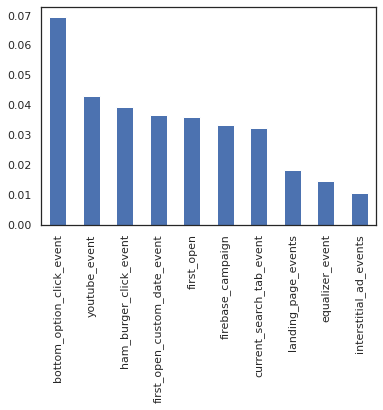

In [68]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X_train.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

In [69]:
weights.sort_values(ascending = False)[:10].index

Index(['bottom_option_click_event', 'youtube_event', 'ham_burger_click_event',
       'first_open_custom_date_event', 'first_open', 'firebase_campaign',
       'current_search_tab_event', 'landing_page_events', 'equalizer_event',
       'interstitial_ad_events'],
      dtype='object')

AxesSubplot(0.125,0.125;0.775x0.755)


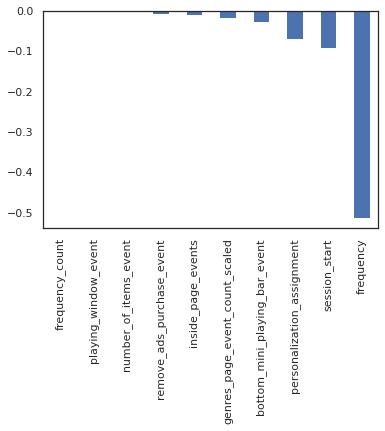

In [70]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [71]:
df.head()

,user_pseudo_id,totalEventCount,engTime_sec,app_exception,app_clear_data,ad_close_event,album_art_change_event,bottom_mini_playing_bar_event,bottom_option_click_event,current_search_tab_event,edit_tags_page_events,equalizer_event,feature_popup_events,firebase_campaign,first_open,first_open_custom_date_event,floating_player_event,font_change_event,genres_page_event,ham_burger_click_event,inside_page_events,interstitial_ad_events,landing_page_events,language_dialog_events,list_item_clicked_event,lyrics_open_event,lyrics_page_events,mini_youtube_event,notification_events,number_of_items_event,os_update,permission_event,personalization_assignment,playing_window_event,playlist_event,playstore_rating_redirect_event,profile_page_events,remove_ads_purchase_event,ringtone_cutter_event,screen_view,settings_page_events,session_start,share,sort_by_events,theme_event,top_tab_event,user_engagement,video_notification_event,voice_assistant_event,wellness_event,widget_events,youtube_event,frequency,churn
0,d6bb454e4eb86f6dafaa486ffeac5479,95.714286,199.27500,0.0,0.0,0.285714,0.0,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.714286,0.0,0.0,5.142857,0.0,0.0,0.0,1.571429,2.428571,0.0,0.0,0.0,37.142857,0.0,0.0,0.0,4.00,0.0,28.714286,0.0,1.714286,0,0.0,0.0,0.0,12.714286,0.0,0.0,0,0.0,0.0,7,1
1,46496b6b416316acabcbf9e16cab37a3,14.000000,17.29000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.00,0.0,6.000000,0.0,1.000000,0,0.0,0.0,0.0,2.000000,0.0,0.0,0,0.0,0.0,1,1
2,284d7c02d9ebdfa9436e780d6d691807,36.250000,57.88425,0.0,0.0,0.000000,0.0,1.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,3.000000,0.0,0.0,0.0,8.250000,0.000000,0.0,0.0,2.5,2.000000,0.0,0.0,0.0,1.75,0.0,10.750000,0.0,2.750000,0,0.0,0.0,0.0,3.750000,0.0,0.0,0,0.0,0.0,4,1
3,1afa4b1c8fd1513e9b63a91042837a67,83.000000,91.86600,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,16.0,0.000000,0.0,0.0,0.0,8.00,0.0,33.000000,0.0,9.000000,0,0.0,0.0,0.0,17.000000,0.0,0.0,0,0.0,0.0,1,1
4,a1e2cf77bdc0172ea33011ac43f39f2f,77.500000,319.76350,0.0,0.0,0.000000,0.0,1.0,2.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,1.0,0.500000,0.0,0.0,9.500000,0.0,0.0,0.0,0.000000,3.500000,0.0,0.0,1.5,4.000000,0.5,0.0,0.0,1.50,0.0,32.500000,0.0,4.000000,0,0.0,0.0,0.0,15.000000,0.0,0.0,0,0.0,0.0,2,1


In [76]:
user_id = df['user_pseudo_id']

In [77]:
type(user_id)

pandas.core.series.Series

In [78]:
user_id.head()

0    d6bb454e4eb86f6dafaa486ffeac5479
1    46496b6b416316acabcbf9e16cab37a3
2    284d7c02d9ebdfa9436e780d6d691807
3    1afa4b1c8fd1513e9b63a91042837a67
4    a1e2cf77bdc0172ea33011ac43f39f2f
Name: user_pseudo_id, dtype: object

In [79]:
type(train_pred_prob[:,1])

numpy.ndarray

In [80]:
train_pred_prob

array([[0.89298035, 0.10701965],
       [0.92356938, 0.07643062],
       [0.88847189, 0.11152811],
       ...,
       [0.88178727, 0.11821273],
       [0.95417652, 0.04582348],
       [0.92092115, 0.07907885]])

In [81]:
model.classes_

array([0, 1])

In [82]:
train_prob = pd.DataFrame({'probability_to_churn': train_pred_prob[:, 1]})
test_prob = pd.DataFrame({'probability_to_churn': test_pred_prob[:, 1]})

In [83]:
prob=pd.concat([train_prob, test_prob], ignore_index=True)
prob.head()

,probability_to_churn
0,0.107020
1,0.076431
2,0.111528
3,0.104436
4,0.108960


In [84]:
prob.shape

(10908, 1)

In [85]:
result = pd.concat([user_id, prob], axis=1)

In [86]:
result.rename(columns={'user_pseudo_id': 'user_id'}, inplace=True)

In [87]:
result.head()

,user_id,probability_to_churn
0,d6bb454e4eb86f6dafaa486ffeac5479,0.107020
1,46496b6b416316acabcbf9e16cab37a3,0.076431
2,284d7c02d9ebdfa9436e780d6d691807,0.111528
3,1afa4b1c8fd1513e9b63a91042837a67,0.104436
4,a1e2cf77bdc0172ea33011ac43f39f2f,0.108960


In [88]:
result.user_id.nunique()

10908

In [89]:
result.to_csv('result.csv')

In [90]:
result.head()

,user_id,probability_to_churn
0,d6bb454e4eb86f6dafaa486ffeac5479,0.107020
1,46496b6b416316acabcbf9e16cab37a3,0.076431
2,284d7c02d9ebdfa9436e780d6d691807,0.111528
3,1afa4b1c8fd1513e9b63a91042837a67,0.104436
4,a1e2cf77bdc0172ea33011ac43f39f2f,0.108960


In [91]:
# train_pred_prob, test_pred_prob # user_id

In [92]:



model = RandomForestClassifier(random_state=192)
result = model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print('Train accuracy', metrics.accuracy_score(y_train, train_pred))
print('Test accuracy', metrics.accuracy_score(y_test, test_pred))
cm=confusion_matrix(y_train,train_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_train, train_pred, target_names=class_names))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train accuracy 0.9988212180746562
Test accuracy 0.9227008860372746
Confusion Matrix: 
 [[7086    0]
 [   9  540]]
              precision    recall  f1-score   support

 Non Churner       1.00      1.00      1.00      7086
     Churner       1.00      0.98      0.99       549

    accuracy                           1.00      7635
   macro avg       1.00      0.99      1.00      7635
weighted avg       1.00      1.00      1.00      7635



<AxesSubplot:>

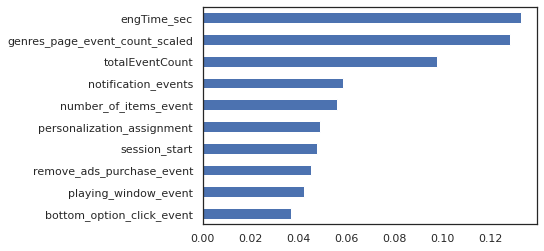

In [93]:
importances = model.feature_importances_
weights = pd.Series(importances,
                 index=X_train.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')